In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
import os

labels = os.listdir('images')
print("No. of labels: {}".format(len(labels)))
print("-----------------")

for label in labels:
    print("{}, {} files".format(label, len(os.listdir('images/' + label))))

No. of labels: 5
-----------------
bulbasaur, 186 files
charmander, 195 files
mewtwo, 194 files
pikachu, 196 files
squirtle, 189 files


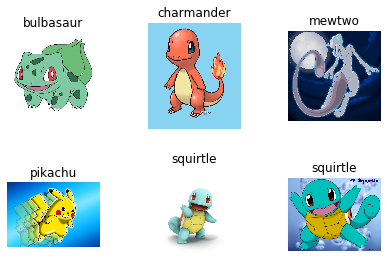

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

fig, ax = plt.subplots(nrows = 2, ncols = 3)
fig.tight_layout()
count = 0
for row in ax:
    for col in row:
        image_name = np.random.choice(os.listdir('images/' + labels[count]))
        im = Image.open("images/{}/{}".format(labels[count],image_name))
        col.imshow(im)
        col.set_title(labels[count])
        col.axis('off')
        count += 1
        if count > 4:
            count -= 1
plt.show()

## Creating a FastAI model

In [9]:
from fastai.vision import *
from fastai.metrics import accuracy

In [10]:
data = ImageDataBunch.from_folder(path = './images/',
                                 ds_tfms = get_transforms(do_flip = True , flip_vert = True),
                                 valid_pct = 0.2,
                                 size = 224,
                                 bs = 32)

In [11]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (768 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bulbasaur,bulbasaur,bulbasaur,bulbasaur,bulbasaur
Path: images;

Valid: LabelList (192 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pikachu,squirtle,mewtwo,bulbasaur,mewtwo
Path: images;

Test: None

In [12]:
learner = create_cnn(data ,
                    models.resnet18 ,
                    metrics = [accuracy] ,
                    callba
                     ck_fns = ShowGraph)

/home/tejasshinde/.local/lib/python3.6/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,2.092301,1.757853,0.218750,02:21
1,1.940112,1.422658,0.406250,02:26
2,1.715360,1.031002,0.635417,02:42
3,1.461706,0.808607,0.776042,02:32
4,1.258777,0.684287,0.817708,02:33
5,1.096404,0.622413,0.843750,02:32
6,0.999025,0.593379,0.854167,03:43


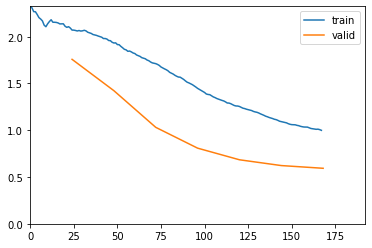

In [ ]:
learner.fit_one_cycle(8 , max_lr = slice(0.0001))

In [ ]:
interpreter = ClassificationInterpretation.from_learner(learner)interpreter.most_confused(min_val=2)